In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
# from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv('updated_csv1.csv')

In [3]:
data.head()
#data4.head()

,Unnamed: 0,Unnamed: 0.1,Zilla/Division,Year,Acres,Hectares,Acres(Maund),Hectare (M.Ton),Production (M. Ton),Type,Latitude,Longitude,Station,Rainfall,Temperature
0,0,0,Bandarban,2012,0.0,0.0,0,0,0.0,Aman,22.195328,92.218377,Chittagong(Patenga),809.0,98.8
1,1,1,Bandarban,2013,235.0,95.0,18.42,1.699,162.0,Aman,22.195328,92.218377,Chittagong(Patenga),542.0,100.1
2,2,2,Bandarban,2014,512.0,207.0,19.03,1.755,364.0,Aman,22.195328,92.218377,Chittagong(Patenga),467.0,102.4
3,3,3,Bandarban,2015,557.0,225.0,20.19,1.862,420.0,Aman,22.195328,92.218377,Chittagong(Patenga),543.0,102.8
4,4,4,Bandarban,2016,560.0,227.0,20.3,1.872,424.0,Aman,22.195328,92.218377,Chittagong(Patenga),661.0,104.6


In [4]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Zilla/Division', 'Year', 'Acres',
       'Hectares', 'Acres(Maund)', 'Hectare (M.Ton)', 'Production (M. Ton)',
       'Type', 'Latitude', 'Longitude', 'Station', 'Rainfall', 'Temperature'],
      dtype='object')

In [5]:
data=data[['Zilla/Division', 'Year', 'Acres','Production (M. Ton)', 'Type',
       'Latitude', 'Longitude', 'Rainfall', 'Temperature']]


In [6]:
data = data.rename(columns={'Zilla/Division': 'District'})

In [7]:
data.head()

,District,Year,Acres,Production (M. Ton),Type,Latitude,Longitude,Rainfall,Temperature
0,Bandarban,2012,0.0,0.0,Aman,22.195328,92.218377,809.0,98.8
1,Bandarban,2013,235.0,162.0,Aman,22.195328,92.218377,542.0,100.1
2,Bandarban,2014,512.0,364.0,Aman,22.195328,92.218377,467.0,102.4
3,Bandarban,2015,557.0,420.0,Aman,22.195328,92.218377,543.0,102.8
4,Bandarban,2016,560.0,424.0,Aman,22.195328,92.218377,661.0,104.6


In [8]:
data.District.unique()

array(['Bandarban', 'Chattagram', "Cox's Bazar", 'Comilla', 'Chandpur',
       'Brahmanbaria', 'Khagrachari', 'Noakhali', 'Lakshmipur', 'Feni',
       'Rangamati', 'Chattagram Division', 'Sylhet', 'Maulavibazar',
       'Sunamgonj', 'Hobigonj', 'Sylhet Division', 'Dhaka', 'Gazipur',
       'Manikgonj', 'Munshigonj', 'Narayangonj', 'Faridpur', 'Rajbari',
       'Madaripur', 'Gopalgonj', 'Shariatpur', 'Kishoregonj', 'Tangail',
       'Dhaka Division', 'Jamalpur', 'Sherpur', 'Netrokona', 'Mymensingh',
       'Mymenshing Division', 'Barishal', 'Jhalakathi', 'Perojpur',
       'Bhola', 'Patuakhali', 'Barguna', 'Barishal Division', 'Jashore',
       'Jhenaidah', 'Magura', 'Narail', 'Khulna', 'Bagerhat', 'Satkhira',
       'Kushtia', 'Chuadanga', 'Meherpur', 'Khulna Division', 'Bogura',
       'Joypurhat', 'Pabna', 'Sirajgonj', 'Rajshahi', 'Naogaon', 'Natore',
       'Chapai Nawabgonj', 'Rajshahi Division', 'Dinajpur', 'Thakurgaon',
       'Panchagar', 'Rangpur', 'Gaibandha', 'Kurigram', 'Nil

In [9]:
data1=data[data["District"].str.contains("Division")==False]

In [10]:
data1

,District,Year,Acres,Production (M. Ton),Type,Latitude,Longitude,Rainfall,Temperature
0,Bandarban,2012,0.0,0.0,Aman,22.195328,92.218377,809.0,98.8
1,Bandarban,2013,235.0,162.0,Aman,22.195328,92.218377,542.0,100.1
2,Bandarban,2014,512.0,364.0,Aman,22.195328,92.218377,467.0,102.4
3,Bandarban,2015,557.0,420.0,Aman,22.195328,92.218377,543.0,102.8
4,Bandarban,2016,560.0,424.0,Aman,22.195328,92.218377,661.0,104.6
...,...,...,...,...,...,...,...,...,...
3257,BANGLADESH,2014,1725099.0,3310892.0,Boro_Hybrid,23.685000,90.356300,102.0,78.2
3258,BANGLADESH,2015,1684661.0,3238915.0,Boro_Hybrid,23.685000,90.356300,187.0,76.6
3259,BANGLADESH,2016,1707808.0,3273091.0,Boro_Hybrid,23.685000,90.356300,123.0,81.7
3260,BANGLADESH,2017,1935471.0,3678373.0,Boro_Hybrid,23.685000,90.356300,330.0,76.5


In [11]:
data2=data1[data1["District"].str.contains("BANGLADESH")==False]

In [12]:
data2

,District,Year,Acres,Production (M. Ton),Type,Latitude,Longitude,Rainfall,Temperature
0,Bandarban,2012,0.0,0.0,Aman,22.195328,92.218377,809.0,98.8
1,Bandarban,2013,235.0,162.0,Aman,22.195328,92.218377,542.0,100.1
2,Bandarban,2014,512.0,364.0,Aman,22.195328,92.218377,467.0,102.4
3,Bandarban,2015,557.0,420.0,Aman,22.195328,92.218377,543.0,102.8
4,Bandarban,2016,560.0,424.0,Aman,22.195328,92.218377,661.0,104.6
...,...,...,...,...,...,...,...,...,...
3243,Nilphamari,2014,65033.0,127930.0,Boro_Hybrid,25.931794,88.856006,39.0,70.3
3244,Nilphamari,2015,61439.0,120401.0,Boro_Hybrid,25.931794,88.856006,120.0,70.5
3245,Nilphamari,2016,63763.0,123255.0,Boro_Hybrid,25.931794,88.856006,74.0,74.5
3246,Nilphamari,2017,81500.0,135499.0,Boro_Hybrid,25.931794,88.856006,228.0,69.8


In [13]:
len(data2.District.unique())

64

In [14]:
dummy1=pd.get_dummies(data2.District, prefix=None)

In [15]:
dummy1

,Bagerhat,Bandarban,Barguna,Barishal,Bhola,Bogura,Brahmanbaria,Chandpur,Chapai Nawabgonj,Chattagram,...,Rangamati,Rangpur,Satkhira,Shariatpur,Sherpur,Sirajgonj,Sunamgonj,Sylhet,Tangail,Thakurgaon
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
dummy2=pd.get_dummies(data2.Type, prefix=None)

In [17]:
dummy2

,Aman,Aman_HYV,Aus,Aus_HYV,Boro,Boro_Hybrid
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
3243,0,0,0,0,0,1
3244,0,0,0,0,0,1
3245,0,0,0,0,0,1
3246,0,0,0,0,0,1


In [18]:
encoded=pd.concat([dummy1, dummy2,data2], axis=1)

In [19]:
encoded

,Bagerhat,Bandarban,Barguna,Barishal,Bhola,Bogura,Brahmanbaria,Chandpur,Chapai Nawabgonj,Chattagram,...,Boro_Hybrid,District,Year,Acres,Production (M. Ton),Type,Latitude,Longitude,Rainfall,Temperature
0,0,1,0,0,0,0,0,0,0,0,...,0,Bandarban,2012,0.0,0.0,Aman,22.195328,92.218377,809.0,98.8
1,0,1,0,0,0,0,0,0,0,0,...,0,Bandarban,2013,235.0,162.0,Aman,22.195328,92.218377,542.0,100.1
2,0,1,0,0,0,0,0,0,0,0,...,0,Bandarban,2014,512.0,364.0,Aman,22.195328,92.218377,467.0,102.4
3,0,1,0,0,0,0,0,0,0,0,...,0,Bandarban,2015,557.0,420.0,Aman,22.195328,92.218377,543.0,102.8
4,0,1,0,0,0,0,0,0,0,0,...,0,Bandarban,2016,560.0,424.0,Aman,22.195328,92.218377,661.0,104.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0,0,0,0,0,0,0,0,0,0,...,1,Nilphamari,2014,65033.0,127930.0,Boro_Hybrid,25.931794,88.856006,39.0,70.3
3244,0,0,0,0,0,0,0,0,0,0,...,1,Nilphamari,2015,61439.0,120401.0,Boro_Hybrid,25.931794,88.856006,120.0,70.5
3245,0,0,0,0,0,0,0,0,0,0,...,1,Nilphamari,2016,63763.0,123255.0,Boro_Hybrid,25.931794,88.856006,74.0,74.5
3246,0,0,0,0,0,0,0,0,0,0,...,1,Nilphamari,2017,81500.0,135499.0,Boro_Hybrid,25.931794,88.856006,228.0,69.8


In [20]:
encoded.drop(['District','Type'], inplace=True, axis=1)

In [21]:
encoded.to_csv("final_data1.csv")

In [22]:
encoded

,Bagerhat,Bandarban,Barguna,Barishal,Bhola,Bogura,Brahmanbaria,Chandpur,Chapai Nawabgonj,Chattagram,...,Aus_HYV,Boro,Boro_Hybrid,Year,Acres,Production (M. Ton),Latitude,Longitude,Rainfall,Temperature
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,2012,0.0,0.0,22.195328,92.218377,809.0,98.8
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,2013,235.0,162.0,22.195328,92.218377,542.0,100.1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,2014,512.0,364.0,22.195328,92.218377,467.0,102.4
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,2015,557.0,420.0,22.195328,92.218377,543.0,102.8
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,2016,560.0,424.0,22.195328,92.218377,661.0,104.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2014,65033.0,127930.0,25.931794,88.856006,39.0,70.3
3244,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2015,61439.0,120401.0,25.931794,88.856006,120.0,70.5
3245,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2016,63763.0,123255.0,25.931794,88.856006,74.0,74.5
3246,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2017,81500.0,135499.0,25.931794,88.856006,228.0,69.8


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [24]:
data.corr()

,Year,Acres,Production (M. Ton),Latitude,Longitude,Rainfall,Temperature
Year,1.000000,-0.003102,-0.002746,0.015515,-0.012319,0.117664,0.053596
Acres,-0.003102,1.000000,0.985140,0.016474,0.006973,0.139188,0.240898
Production (M. Ton),-0.002746,0.985140,1.000000,0.022805,0.000851,0.130100,0.228674
Latitude,0.015515,0.016474,0.022805,1.000000,-0.416281,-0.065942,-0.034959
Longitude,-0.012319,0.006973,0.000851,-0.416281,1.000000,0.322959,-0.007486
Rainfall,0.117664,0.139188,0.130100,-0.065942,0.322959,1.000000,0.709938
Temperature,0.053596,0.240898,0.228674,-0.034959,-0.007486,0.709938,1.000000


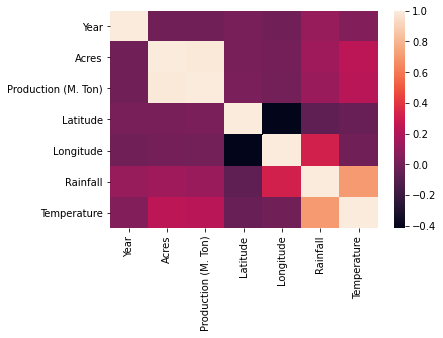

In [25]:
sns.heatmap(data.corr());

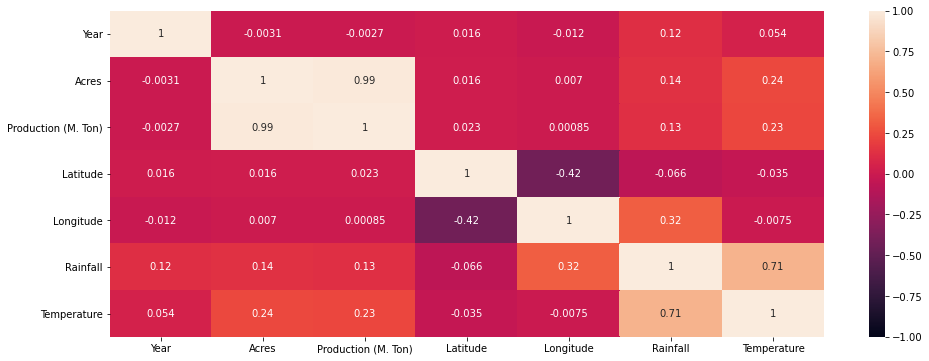

In [26]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

In [27]:
encoded.drop(['Latitude','Longitude'], inplace=True, axis=1)

In [28]:
encoded.describe()

,Bagerhat,Bandarban,Barguna,Barishal,Bhola,Bogura,Brahmanbaria,Chandpur,Chapai Nawabgonj,Chattagram,...,Aman_HYV,Aus,Aus_HYV,Boro,Boro_Hybrid,Year,Acres,Production (M. Ton),Rainfall,Temperature
count,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,...,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2851.000000,2.852000e+03,2851.000000,2851.00000
mean,0.016129,0.016129,0.016129,0.016129,0.016830,0.016129,0.016129,0.016129,0.008415,0.016129,...,0.173913,0.173913,0.173913,0.152174,0.152174,2023.430224,45194.733525,5.136212e+04,889.347597,121.34651
std,0.125994,0.125994,0.125994,0.125994,0.128658,0.125994,0.125994,0.125994,0.091363,0.125994,...,0.379101,0.379101,0.379101,0.359252,0.359252,431.576357,83507.555561,1.079104e+05,786.329433,48.80583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,0.000000,0.000000e+00,0.000000,67.70000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,559.000000,4.360000e+02,235.000000,93.20000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,7424.000000,6.672500e+03,690.000000,110.10000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,52564.500000,5.787625e+04,1346.000000,117.60000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,25063.000000,678573.000000,2.390732e+06,5371.000000,232.00000


In [29]:
encoded.sort_values(by='Production (M. Ton)', ascending=False).head(10)

,Bagerhat,Bandarban,Barguna,Barishal,Bhola,Bogura,Brahmanbaria,Chandpur,Chapai Nawabgonj,Chattagram,...,Aman_HYV,Aus,Aus_HYV,Boro,Boro_Hybrid,Year,Acres,Production (M. Ton),Rainfall,Temperature
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2013,391728.0,2390731.508,693.0,99.0
1011,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2015,125655.0,1463640.000,1536.0,222.7
3228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2013,58310.0,1066029.000,133.0,71.3
1071,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2019,678573.0,783690.000,2118.0,222.2
1070,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2018,634723.0,763847.000,881.0,220.6
1069,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2017,625818.0,708262.000,1645.0,221.5
1068,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2016,599917.0,624998.000,1613.0,223.8
1065,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2013,572138.0,624675.000,1817.0,219.5
1067,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2015,598499.0,614361.000,1909.0,221.0
1064,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2012,565312.0,603717.000,1498.0,220.9


In [30]:
x=encoded.drop('Production (M. Ton)', inplace=False, axis=1)
y=encoded['Production (M. Ton)']

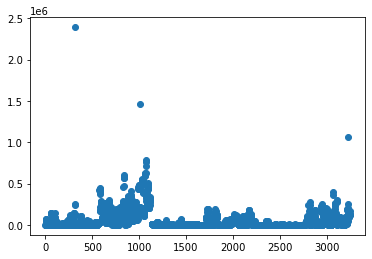

In [31]:
plt.scatter(encoded.index,y)
plt.show()

In [32]:
encoded['Production (M. Ton)'].replace(encoded['Production (M. Ton)'].nlargest(3).values,encoded['Production (M. Ton)'].mean(), inplace=True)

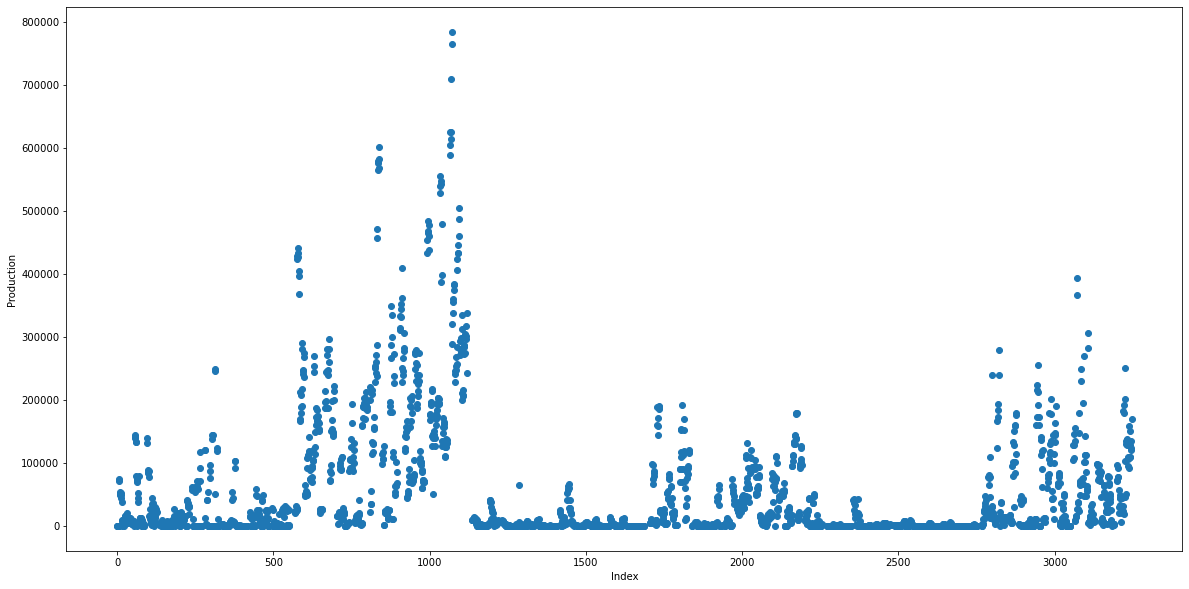

In [33]:
plt.figure(figsize=(20,10))
plt.ylabel('Production')
plt.xlabel('Index')
plt.scatter(encoded.index,y)
plt.show()

In [34]:
from sklearn import preprocessing

x_v = x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_v)
x = pd.DataFrame(x_scaled, columns=x.columns)

In [35]:
x.isnull().values.any()

True

In [36]:
print(x.isnull().values.sum())

3


In [37]:
x['Temperature'].fillna((x['Temperature'].mean()), inplace=True)
x['Rainfall'].fillna((x['Rainfall'].mean()), inplace=True)
x['Acres'].fillna((x['Acres'].mean()), inplace=True)

In [38]:
print(x.isnull().values.sum())

0


In [39]:
x.head()

,Bagerhat,Bandarban,Barguna,Barishal,Bhola,Bogura,Brahmanbaria,Chandpur,Chapai Nawabgonj,Chattagram,...,Aman,Aman_HYV,Aus,Aus_HYV,Boro,Boro_Hybrid,Year,Acres,Rainfall,Temperature
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.150624,0.189288
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000043,0.000346,0.100912,0.197200
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000087,0.000755,0.086948,0.211199
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000130,0.000821,0.101098,0.213634
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000174,0.000825,0.123068,0.224589


In [40]:
y

0            0.0
1          162.0
2          364.0
3          420.0
4          424.0
          ...   
3243    127930.0
3244    120401.0
3245    123255.0
3246    135499.0
3247    169245.0
Name: Production (M. Ton), Length: 2852, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)
#A_train,A_test,b_train,b_test = train_test_split(x1,y1, test_size=0.2,random_state=40)

In [42]:
import numpy as np
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

from sklearn import preprocessing,svm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [43]:
clf=LinearRegression()
fit=clf.fit(X_train,y_train)
fit.score(X_train,y_train)

0.9584662403414654

In [44]:
fit.score(X_test,y_test)

0.9350257557650254

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math 
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [46]:
# transform the validation dataset
predictions = fit.predict(X_test)
print((mean_absolute_error(y_test, predictions)))
print (mean_squared_error(y_test, predictions))
print(math.sqrt(mean_squared_error(y_test, predictions)))
print(median_absolute_error(y_test, predictions))
print(explained_variance_score(y_test, predictions))
print(r2_score(y_test, predictions))

11910.893881169204
578575237.1907753
24053.590941702972
6326.0
0.9356685443976916
0.9350257557650254


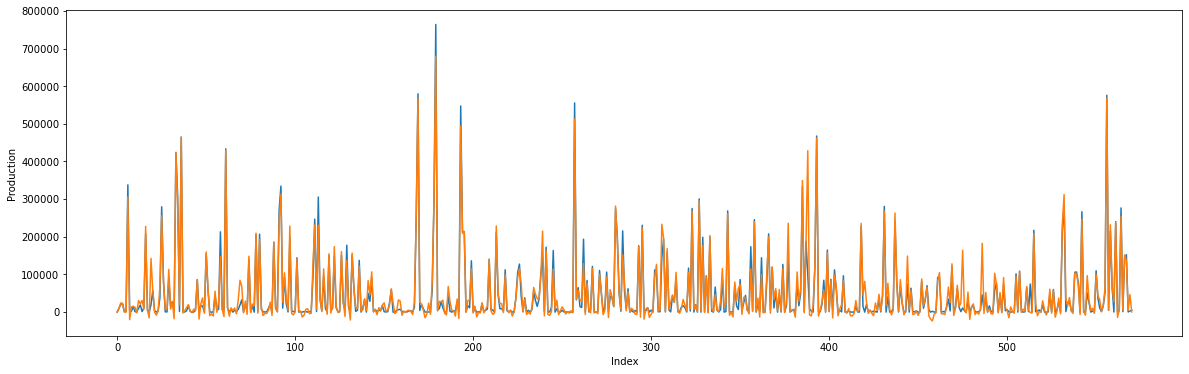

In [57]:
plt.figure(figsize=(20, 6))
plt.plot(y_test.values)
plt.plot(predictions)
plt.xlabel('Index')
plt.ylabel('Production')
#plt.plot(y_test.values)
#plt.plot(predictions)
#plt.grid(True)
plt.show()

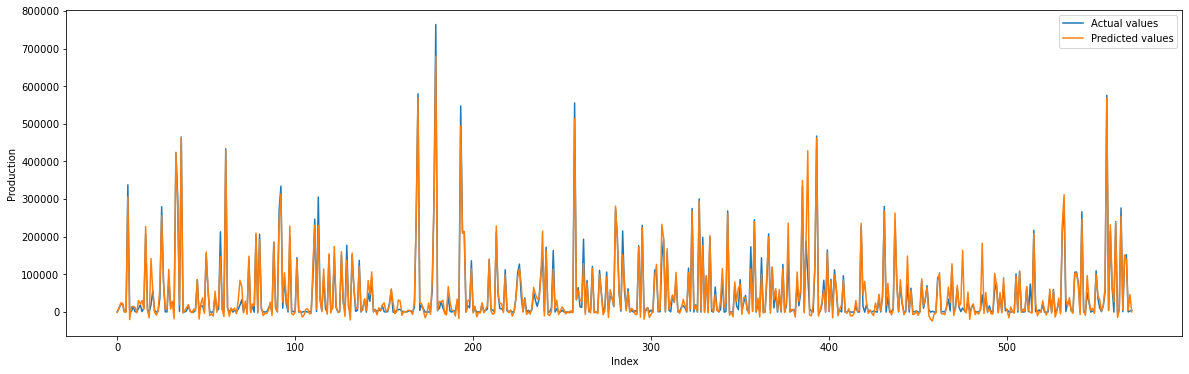

In [58]:
plt.figure(figsize=(20, 6))
plt.plot(y_test.values,label="Actual values")
plt.plot(predictions,label="Predicted values")
plt.ylabel('Production')
plt.xlabel('Index')
#plt.plot(y_test.values)
#plt.plot(predictions)
#plt.grid(True)
legend = plt.legend()
plt.show()

In [59]:
model = DecisionTreeRegressor(random_state=21)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=21)

In [60]:
predictions = model.predict(X_test)
print((mean_absolute_error(y_test, predictions)))
print (mean_squared_error(y_test, predictions))
print(math.sqrt(mean_squared_error(y_test, predictions)))
print(median_absolute_error(y_test, predictions))
print(explained_variance_score(y_test, predictions))
print(r2_score(y_test, predictions))

6068.9765431657015
530148894.2567823
23024.96241596894
616.0
0.9409825527232298
0.9404640545910818


In [61]:
predictions

array([5.750000e+02, 8.832000e+03, 2.255000e+04, 2.141200e+04,
       1.237000e+03, 1.331000e+03, 2.999240e+05, 4.902000e+03,
       3.096000e+03, 1.574800e+04, 1.267000e+03, 0.000000e+00,
       1.149500e+04, 2.023900e+04, 1.455200e+04, 1.191700e+04,
       2.057600e+05, 7.682000e+03, 4.220000e+02, 1.605070e+05,
       5.178300e+04, 4.051000e+03, 0.000000e+00, 2.465000e+03,
       4.174700e+04, 2.280030e+05, 9.053800e+04, 9.250000e+02,
       5.770000e+02, 1.046500e+05, 1.581000e+04, 2.613600e+04,
       4.200000e+02, 4.058140e+05, 2.820940e+05, 2.007700e+04,
       4.322930e+05, 2.340000e+02, 3.850000e+02, 3.200000e+03,
       1.806800e+04, 1.600000e+03, 0.000000e+00, 0.000000e+00,
       1.202300e+04, 8.297500e+04, 3.210000e+02, 2.007700e+04,
       1.510500e+04, 2.910000e+02, 1.534600e+05, 5.049000e+04,
       6.930000e+02, 0.000000e+00, 0.000000e+00, 4.462300e+04,
       4.875000e+03, 9.542000e+03, 1.789890e+05, 7.703000e+03,
       3.313000e+03, 4.331400e+05, 9.066000e+03, 0.0000

In [62]:
y_test.values

array([5.78000000e+02, 9.71000000e+03, 2.07790000e+04, 2.28580000e+04,
       1.15200000e+03, 1.24700000e+03, 3.37869000e+05, 4.96500000e+03,
       1.95700000e+03, 1.53740000e+04, 1.35000000e+03, 0.00000000e+00,
       1.02630000e+04, 1.90100000e+04, 1.29400000e+03, 1.10530000e+04,
       2.08172000e+05, 6.64900000e+03, 1.29000000e+02, 1.90800000e+04,
       5.71400000e+04, 3.96300000e+03, 0.00000000e+00, 2.54900000e+03,
       3.78240000e+04, 2.79711000e+05, 8.41680000e+04, 7.12000000e+02,
       5.63000000e+02, 9.05820000e+04, 1.66430000e+04, 2.81490000e+04,
       4.24000000e+02, 4.22961000e+05, 3.06203000e+05, 1.54400000e+03,
       4.65069000e+05, 2.42000000e+02, 3.90000000e+02, 3.54300000e+03,
       1.69160000e+04, 2.18800000e+03, 0.00000000e+00, 0.00000000e+00,
       7.76100000e+03, 8.62220000e+04, 3.64000000e+02, 1.66320000e+04,
       1.58480000e+04, 4.28000000e+02, 1.54553000e+05, 6.09880000e+04,
       5.69000000e+02, 0.00000000e+00, 0.00000000e+00, 4.58120000e+04,
      

In [63]:
y_test.max()

763847.0

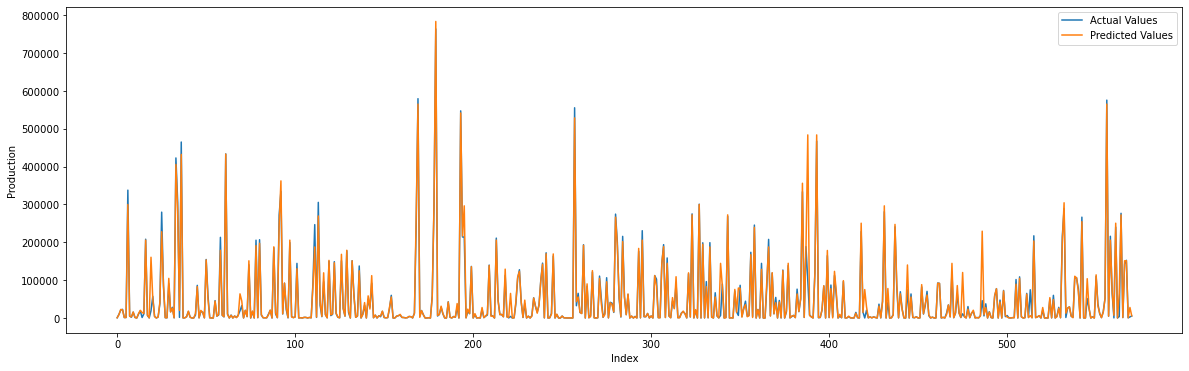

In [83]:
plt.figure(figsize=(20, 6))
plt.plot(y_test.values,label="Actual Values")
plt.plot(predictions,label="Predicted Values")
plt.ylabel('Production')
plt.xlabel('Index')
legend = plt.legend()
plt.show()

In [66]:
# from sklearn.tree import DecisionTreeRegressor
# dtr = DecisionTreeRegressor(max_depth = 5)
# training_testing_phase(dtr,'Decision Tree Regression')
# #dtr.fit(X_train,y_train)
# #pred_train=dtr.predict(X_train)
# pred_test=dtr.predict(X_test)
# mean_error = mean_squared_error(y_test,pred_test)
# pred_test
model_1 = KNeighborsRegressor()
model_1.fit(X_train, y_train)

KNeighborsRegressor()

In [67]:
predictions_1 = model_1.predict(X_test)
print((mean_absolute_error(y_test, predictions_1)))
print (mean_squared_error(y_test, predictions_1))
print(math.sqrt(mean_squared_error(y_test, predictions_1)))
print(median_absolute_error(y_test, predictions_1))
print(explained_variance_score(y_test, predictions_1))
print(r2_score(y_test, predictions_1))

11406.685930205982
671261480.45008
25908.714372775816
2239.8
0.9246394454674105
0.9246170513828733


In [68]:
predictions_1

array([7.200000e+00, 1.060220e+04, 2.596800e+04, 2.589260e+04,
       4.814000e+02, 1.072000e+03, 2.841138e+05, 1.958060e+04,
       2.018200e+03, 1.681220e+04, 1.736600e+03, 0.000000e+00,
       1.773980e+04, 1.824280e+04, 3.057120e+04, 6.309800e+03,
       2.497432e+05, 1.681220e+04, 3.670000e+02, 2.014016e+05,
       4.761720e+04, 6.342800e+03, 4.398000e+02, 4.492000e+03,
       2.061480e+04, 2.514014e+05, 1.427526e+05, 8.484000e+02,
       8.484000e+02, 7.638320e+04, 2.469100e+04, 2.367080e+04,
       1.584360e+04, 4.498504e+05, 2.702512e+05, 1.032980e+04,
       4.522178e+05, 4.914000e+02, 1.482200e+03, 9.947400e+03,
       8.384200e+03, 8.510000e+02, 0.000000e+00, 0.000000e+00,
       1.209660e+04, 5.963520e+04, 1.438880e+04, 1.032980e+04,
       2.310540e+04, 4.928000e+02, 1.304798e+05, 6.942040e+04,
       1.066600e+03, 0.000000e+00, 0.000000e+00, 3.596560e+04,
       7.963000e+03, 9.954600e+03, 2.007250e+05, 3.114200e+03,
       4.495600e+03, 4.498504e+05, 1.425180e+04, 4.7936

In [69]:
y_test.values

array([5.78000000e+02, 9.71000000e+03, 2.07790000e+04, 2.28580000e+04,
       1.15200000e+03, 1.24700000e+03, 3.37869000e+05, 4.96500000e+03,
       1.95700000e+03, 1.53740000e+04, 1.35000000e+03, 0.00000000e+00,
       1.02630000e+04, 1.90100000e+04, 1.29400000e+03, 1.10530000e+04,
       2.08172000e+05, 6.64900000e+03, 1.29000000e+02, 1.90800000e+04,
       5.71400000e+04, 3.96300000e+03, 0.00000000e+00, 2.54900000e+03,
       3.78240000e+04, 2.79711000e+05, 8.41680000e+04, 7.12000000e+02,
       5.63000000e+02, 9.05820000e+04, 1.66430000e+04, 2.81490000e+04,
       4.24000000e+02, 4.22961000e+05, 3.06203000e+05, 1.54400000e+03,
       4.65069000e+05, 2.42000000e+02, 3.90000000e+02, 3.54300000e+03,
       1.69160000e+04, 2.18800000e+03, 0.00000000e+00, 0.00000000e+00,
       7.76100000e+03, 8.62220000e+04, 3.64000000e+02, 1.66320000e+04,
       1.58480000e+04, 4.28000000e+02, 1.54553000e+05, 6.09880000e+04,
       5.69000000e+02, 0.00000000e+00, 0.00000000e+00, 4.58120000e+04,
      

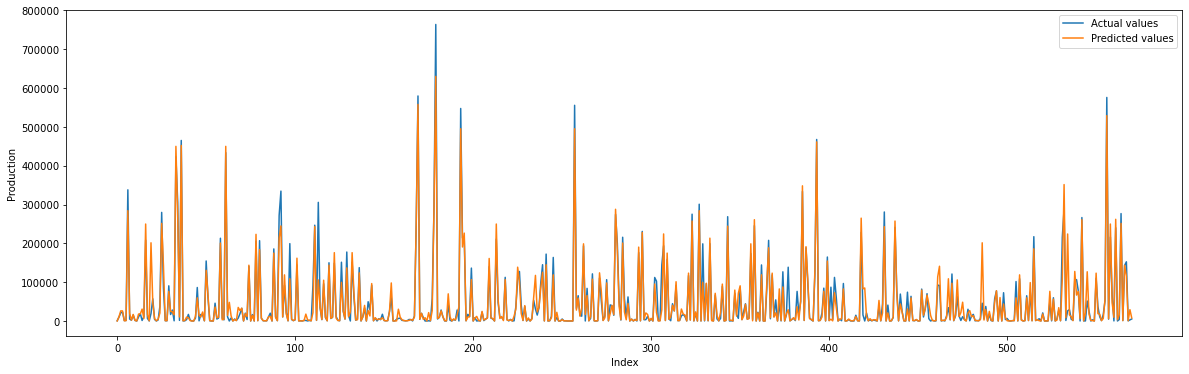

In [70]:
plt.figure(figsize=(20, 6))
plt.plot(y_test.values,label="Actual values")
plt.plot(predictions_1,label="Predicted values")
plt.ylabel('Production')
plt.xlabel('Index')
#plt.plot(y_test.values)
#plt.plot(predictions)
#plt.grid(True)
legend = plt.legend()
plt.show()

In [71]:
model_2 = RandomForestRegressor(random_state=21)
model_2.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

In [72]:
predictions_2 = model_2.predict(X_test)
print((mean_absolute_error(y_test, predictions_2)))
print (mean_squared_error(y_test, predictions_2))
print(math.sqrt(mean_squared_error(y_test, predictions_2)))
print(median_absolute_error(y_test, predictions_2))
print(explained_variance_score(y_test, predictions_2))
print(r2_score(y_test, predictions_2))

5880.02013892694
499869196.05229944
22357.754718493077
771.0100000000002
0.9445401052078266
0.9438644775266571


In [73]:
predictions_2

array([5.48920000e+02, 9.25929000e+03, 2.09962800e+04, 2.24067900e+04,
       1.37968000e+03, 9.91100000e+02, 3.19692080e+05, 4.89527000e+03,
       8.44273000e+03, 1.65576900e+04, 1.24067000e+03, 0.00000000e+00,
       2.41303800e+04, 1.82446700e+04, 1.95432000e+04, 1.15032500e+04,
       2.10564670e+05, 8.86002000e+03, 4.20130000e+02, 1.73427166e+05,
       5.34349100e+04, 4.44272000e+03, 0.00000000e+00, 2.79947000e+03,
       5.11239800e+04, 2.48166830e+05, 8.15880500e+04, 7.16240000e+02,
       6.00790000e+02, 1.01109910e+05, 1.72178900e+04, 2.61812000e+04,
       3.90850000e+02, 4.13643540e+05, 2.82206450e+05, 2.27072300e+04,
       4.63555110e+05, 2.28970000e+02, 4.84130000e+02, 3.26369000e+03,
       1.72952500e+04, 2.25769000e+03, 0.00000000e+00, 0.00000000e+00,
       8.61343000e+03, 8.23957500e+04, 3.02180000e+02, 2.08524800e+04,
       1.55653300e+04, 3.69550000e+02, 1.60278590e+05, 5.44022200e+04,
       8.46880000e+02, 0.00000000e+00, 0.00000000e+00, 4.46820600e+04,
      

In [74]:
y_test.values

array([5.78000000e+02, 9.71000000e+03, 2.07790000e+04, 2.28580000e+04,
       1.15200000e+03, 1.24700000e+03, 3.37869000e+05, 4.96500000e+03,
       1.95700000e+03, 1.53740000e+04, 1.35000000e+03, 0.00000000e+00,
       1.02630000e+04, 1.90100000e+04, 1.29400000e+03, 1.10530000e+04,
       2.08172000e+05, 6.64900000e+03, 1.29000000e+02, 1.90800000e+04,
       5.71400000e+04, 3.96300000e+03, 0.00000000e+00, 2.54900000e+03,
       3.78240000e+04, 2.79711000e+05, 8.41680000e+04, 7.12000000e+02,
       5.63000000e+02, 9.05820000e+04, 1.66430000e+04, 2.81490000e+04,
       4.24000000e+02, 4.22961000e+05, 3.06203000e+05, 1.54400000e+03,
       4.65069000e+05, 2.42000000e+02, 3.90000000e+02, 3.54300000e+03,
       1.69160000e+04, 2.18800000e+03, 0.00000000e+00, 0.00000000e+00,
       7.76100000e+03, 8.62220000e+04, 3.64000000e+02, 1.66320000e+04,
       1.58480000e+04, 4.28000000e+02, 1.54553000e+05, 6.09880000e+04,
       5.69000000e+02, 0.00000000e+00, 0.00000000e+00, 4.58120000e+04,
      

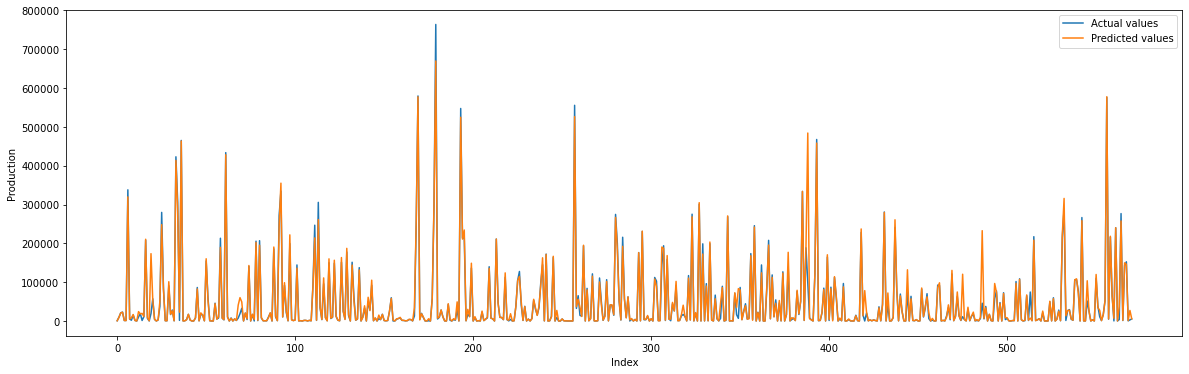

In [76]:
plt.figure(figsize=(20, 6))
plt.plot(y_test.values,label="Actual values")
plt.plot(predictions_2,label="Predicted values")
plt.ylabel('Production')
plt.xlabel('Index')
#plt.plot(y_test.values)
#plt.plot(predictions)
#plt.grid(True)
legend = plt.legend()
plt.show()

In [77]:
model_3=GradientBoostingRegressor()
model_3.fit(X_train, y_train)

GradientBoostingRegressor()

In [78]:
predictions_3 = model_3.predict(X_test)
print((mean_absolute_error(y_test, predictions_3)))
print (mean_squared_error(y_test, predictions_3))
print(math.sqrt(mean_squared_error(y_test, predictions_3)))
print(median_absolute_error(y_test, predictions_3))
print(explained_variance_score(y_test, predictions_3))
print(r2_score(y_test, predictions_3))

6827.054238620361
482904315.57480645
21975.083971962576
1508.4811475741715
0.9463083336483448
0.9457696407910129


In [80]:
predictions_3

array([ 2.77141102e+02,  5.76829333e+03,  2.08267546e+04,  2.29800622e+04,
        9.58862006e+02,  6.66725869e+01,  3.13864536e+05,  3.01216178e+03,
        3.80461365e+03,  1.43921907e+04,  3.38250412e+03, -2.70907576e+02,
        1.43715179e+04,  1.61237316e+04,  1.64048481e+04,  1.06384638e+04,
        2.27849642e+05,  5.64870323e+03, -5.74361963e+00,  1.76836856e+05,
        5.50180366e+04,  5.05804139e+03, -2.62131235e+02,  1.64997129e+03,
        5.53165993e+04,  2.54663553e+05,  7.94033601e+04, -9.89152495e+01,
       -9.89152495e+01,  9.95414638e+04,  1.37848245e+04,  2.65450579e+04,
       -5.74361963e+00,  4.09657827e+05,  2.73703436e+05,  2.65714781e+04,
        4.73320677e+05,  2.59429246e+03,  5.17815153e+02,  7.54046616e+03,
        1.53212109e+04,  1.65874764e+03,  1.15134533e+02,  5.80326340e+03,
        1.11980057e+04,  8.06601297e+04, -5.65285522e+02,  2.78629934e+04,
        1.65244382e+04,  1.09804880e+03,  1.69446729e+05,  4.95805358e+04,
        2.05772364e+02, -

In [81]:
y_test.values

array([5.78000000e+02, 9.71000000e+03, 2.07790000e+04, 2.28580000e+04,
       1.15200000e+03, 1.24700000e+03, 3.37869000e+05, 4.96500000e+03,
       1.95700000e+03, 1.53740000e+04, 1.35000000e+03, 0.00000000e+00,
       1.02630000e+04, 1.90100000e+04, 1.29400000e+03, 1.10530000e+04,
       2.08172000e+05, 6.64900000e+03, 1.29000000e+02, 1.90800000e+04,
       5.71400000e+04, 3.96300000e+03, 0.00000000e+00, 2.54900000e+03,
       3.78240000e+04, 2.79711000e+05, 8.41680000e+04, 7.12000000e+02,
       5.63000000e+02, 9.05820000e+04, 1.66430000e+04, 2.81490000e+04,
       4.24000000e+02, 4.22961000e+05, 3.06203000e+05, 1.54400000e+03,
       4.65069000e+05, 2.42000000e+02, 3.90000000e+02, 3.54300000e+03,
       1.69160000e+04, 2.18800000e+03, 0.00000000e+00, 0.00000000e+00,
       7.76100000e+03, 8.62220000e+04, 3.64000000e+02, 1.66320000e+04,
       1.58480000e+04, 4.28000000e+02, 1.54553000e+05, 6.09880000e+04,
       5.69000000e+02, 0.00000000e+00, 0.00000000e+00, 4.58120000e+04,
      

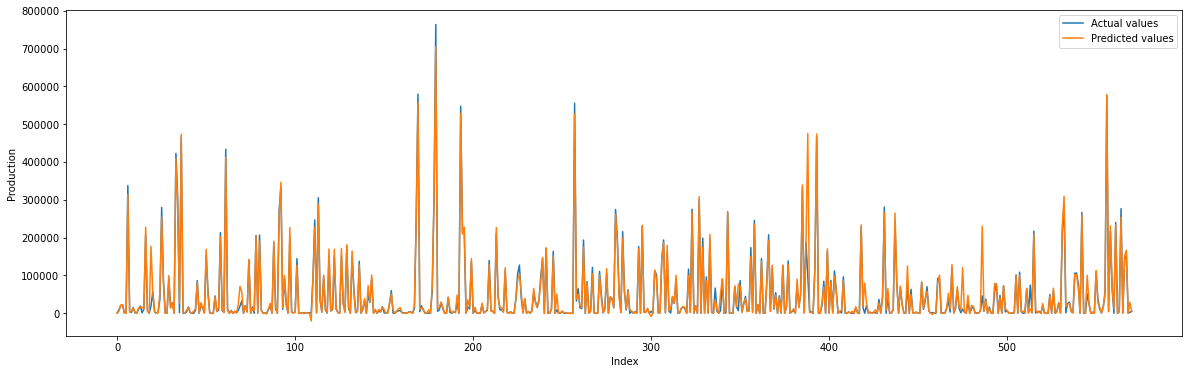

In [82]:
plt.figure(figsize=(20, 6))
plt.plot(y_test.values,label="Actual values")
plt.plot(predictions_3,label="Predicted values")
plt.ylabel('Production')
plt.xlabel('Index')
#plt.plot(y_test.values)
#plt.plot(predictions)
#plt.grid(True)
legend = plt.legend()
plt.show()

## Weather forecasting


In [215]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [216]:
rainfall=pd.read_csv('preprocessed_rainfall.csv')

In [217]:
rainfall.rename(columns={'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
       'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12},inplace=True)

In [218]:
def format_data(station):
    temp=rainfall[rainfall['Area']==station]
    temp['Year']=temp['Year'].astype(int)
    temp=temp.tail(20)
    month=[]
    for j in range(len(temp)):
        for i in range(1,13):
            month.append([station,'{}'.format(temp.iloc[j]['Year'])+'-{}'.format(i),temp.iloc[j][i]])
                
    formated=pd.DataFrame(month,columns=['Station','Date','Rainfall'])
    formated['Date']=pd.to_datetime(formated['Date'],infer_datetime_format=True)
    indexedformated=formated.set_index(['Date'])
    return indexedformated

In [219]:
t=format_data("Sylhet")
df=t[['Rainfall']]

C:\Users\Junayed hossain\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [220]:
df

,Rainfall
Date,
2000-01-01,48.0
2000-02-01,3.0
2000-03-01,119.0
2000-04-01,500.0
2000-05-01,670.0
...,...
2019-08-01,446.0
2019-09-01,309.0
2019-10-01,348.0


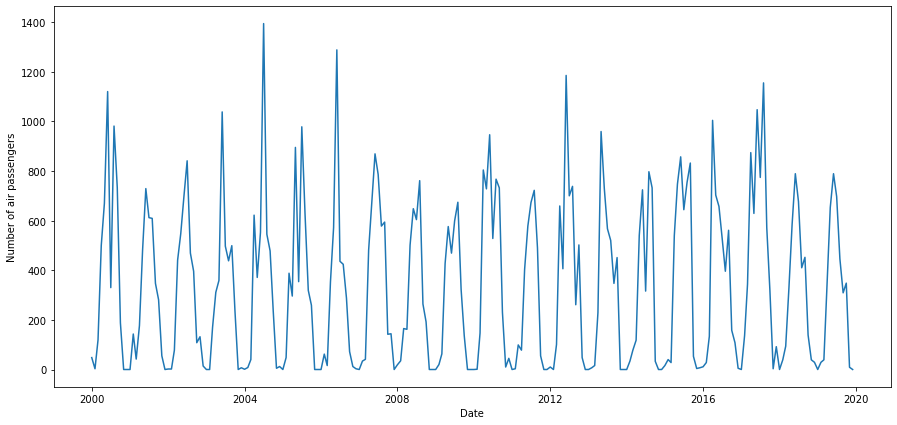

In [221]:
plt.figure(figsize=(15,7))
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(df)

In [222]:
import pmdarima as pm
#pm.__version__
#from pmdarima import auto_arima

In [223]:
smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3137.440, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3086.789, Time=0.54 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3135.525, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=3138.553, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=3044.611, Time=1.53 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.31 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=3043.787, Time=0.68 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=3086.149, Time=0.48 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.79 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=3044.744, Time=1.08 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=inf, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  240
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood               -1517.876
Date:                  Tue, 11 May 2021   AIC                           3041.753
Time:                          18:07:15   BIC                           3052.041
Sample:                               0   HQIC                          3045.904
                                  - 240                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6752      0.042    -16.019      0.000      -0.758      -0.593
ar.S.L24      -0.4410      0.042    -10.580      0.000      -0.523      -0.359
sigma2      3.446e+04   2163.311     15.931      0.000    3.02e+04    3.87e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.28   Jarque-Bera (JB):                85.93
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.79
Prob(H) (two-sided):                  0.94   Kurtosis:                         5.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

2018-01-01   -2.315886e-16
2018-02-01    7.896808e+01
2018-03-01    1.863813e+02
2018-04-01    5.760640e+02
2018-05-01    6.260206e+02
2018-06-01    9.027727e+02
2018-07-01    7.262709e+02
2018-08-01    7.502224e+02
2018-09-01    4.580312e+02
2018-10-01    2.858170e+02
2018-11-01    1.338095e+01
2018-12-01    4.736273e+01
2019-01-01   -2.704991e-16
2019-02-01    4.963906e+01
2019-03-01    1.111223e+02
2019-04-01    4.143701e+02
2019-05-01    6.133687e+02
2019-06-01    8.259526e+02
2019-07-01    6.976874e+02
2019-08-01    5.289339e+02
2019-09-01    4.204643e+02
2019-10-01    2.356387e+02
2019-11-01    2.365229e+01
2019-12-01    2.817148e+01
2020-01-01   -2.822233e-16
2020-02-01    4.740732e+01
2020-03-01    9.694556e+01
2020-04-01    4.234164e+02
2020-05-01    6.338087e+02
2020-06-01    8.276506e+02
2020-07-01    7.040793e+02
2020-08-01    5.441936e+02
2020-09-01    3.801100e+02
2020-10-01    2.969409e+02
2020-11-01    1.478510e+01
2020-12-01    2.024355e+01
2021-01-01   -2.571483e-16
2

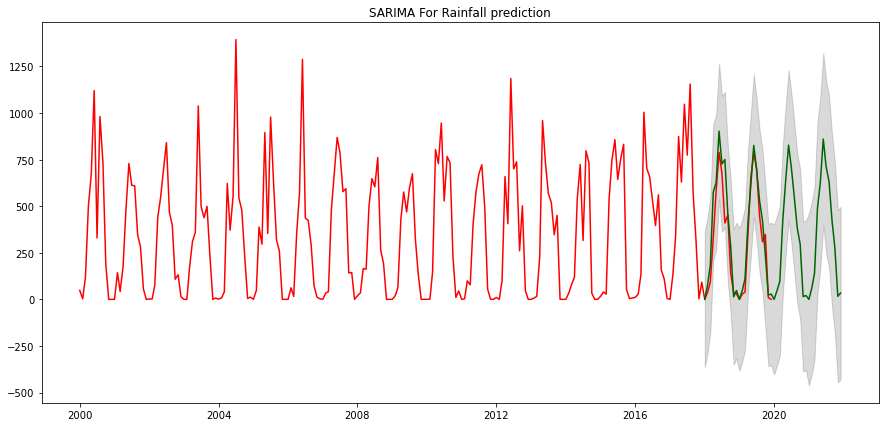

In [224]:
# Forecast
n_periods = 48
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df[:217].index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)
print(fitted_series)
# Plot
plt.figure(figsize=(15,7))
plt.plot(df,color='red')
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA For Rainfall prediction")
plt.show()

## Temperature forecasting

In [161]:
temperature=pd.read_csv('preprocessed_avg_temp.csv')

In [162]:
temperature.rename(columns={'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
       'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12},inplace=True)

In [163]:

temperature.drop(columns=['Average'],inplace=True)

In [164]:
def format_data(station):
    temp=temperature[temperature['Area']==station]
    temp['Year']=temp['Year'].astype(int)
    temp=temp.tail(20)
    month=[]
    for j in range(len(temp)):
        for i in range(1,13):
            month.append([station,'{}'.format(temp.iloc[j]['Year'])+'-{}'.format(i),temp.iloc[j][i]])
                
    formated=pd.DataFrame(month,columns=['Station','Date','Temperature'])
    formated['Date']=pd.to_datetime(formated['Date'],infer_datetime_format=True)
    indexedformated=formated.set_index(['Date'])
    return indexedformated

In [165]:
t=format_data("Sylhet")
df=t[['Temperature']]

C:\Users\Junayed hossain\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


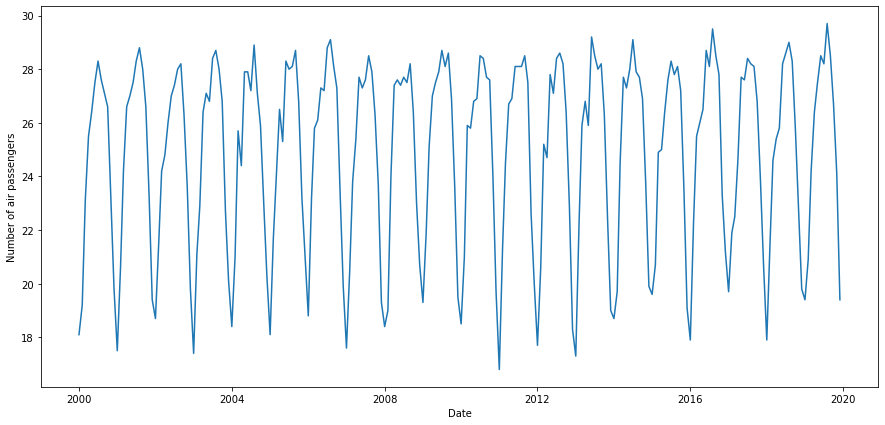

In [166]:
plt.figure(figsize=(15,7))
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(df)

In [167]:
smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=679.441, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=607.834, Time=0.34 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=677.926, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=681.431, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=570.708, Time=0.61 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.66 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=569.406, Time=0.47 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=607.148, Time=0.31 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.87 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=570.748, Time=0.65 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=572.592, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  240
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                -281.306
Date:                  Tue, 11 May 2021   AIC                            568.612
Time:                          15:53:30   BIC                            578.900
Sample:                               0   HQIC                           572.763
                                  - 240                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7529      0.058    -13.089      0.000      -0.866      -0.640
ar.S.L24      -0.4101      0.061     -6.769      0.000      -0.529      -0.291
sigma2         0.6654      0.059     11.340      0.000       0.550       0.780
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                 5.10
Prob(Q):                              0.43   Prob(JB):                         0.08
Heteroskedasticity (H):               1.14   Skew:                            -0.30
Prob(H) (two-sided):                  0.56   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

2019-12-01    19.008847
2020-01-01    21.515784
2020-02-01    23.639931
2020-03-01    25.360024
2020-04-01    26.999278
2020-05-01    28.028064
2020-06-01    28.419138
2020-07-01    28.844883
2020-08-01    28.267398
2020-09-01    26.432499
2020-10-01    23.538071
2020-11-01    20.070258
2020-12-01    18.688182
2021-01-01    21.298226
2021-02-01    24.225650
2021-03-01    25.732913
2021-04-01    26.679086
2021-05-01    28.260352
2021-06-01    28.418193
2021-07-01    29.201624
2021-08-01    28.360502
2021-09-01    26.264802
2021-10-01    23.386994
2021-11-01    19.729665
Freq: MS, dtype: float64


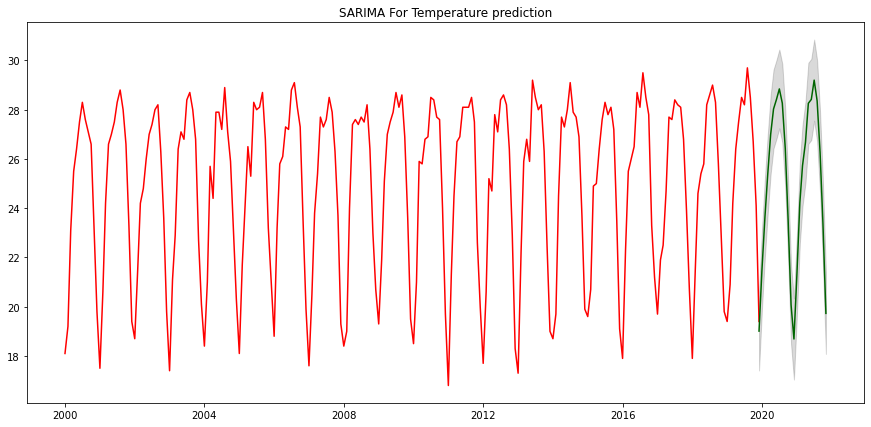

In [168]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)
print(fitted_series)
# Plot
plt.figure(figsize=(15,7))
plt.plot(df,color='red')
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA For Temperature prediction")
plt.show()

## Testing with forecasted values


In [169]:
testing=pd.read_csv('updated_csv2.csv')

In [170]:
testing.head()

,Bagerhat,Bandarban,Barguna,Barishal,Bhola,Bogura,Brahmanbaria,Chandpur,Chapai Nawabgonj,Chattagram,...,Sunamgonj,Sylhet,Tangail,Thakurgaon,Year,Acres,Type,Station,Rainfall,Temperature
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2020,205803,Aman,Sylhet,346.56068,88.72901
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2021,170951,Aman,Sylhet,287.46247,69.38145
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2020,168398,Aman_HYV,Sylhet,3809.87838,210.59959
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2021,175620,Aman_HYV,Sylhet,3373.00000,69.38145
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2020,1544,Aus,Sylhet,3005.28650,112.29136


In [171]:
x.columns

Index(['Bagerhat', 'Bandarban', 'Barguna', 'Barishal', 'Bhola', 'Bogura',
       'Brahmanbaria', 'Chandpur', 'Chapai Nawabgonj', 'Chattagram',
       'Chuadanga', 'Comilla', 'Cox's Bazar', 'Dhaka', 'Dinajpur', 'Faridpur',
       'Feni', 'Gaibandha', 'Gazipur', 'Gopalgonj', 'Hobigonj', 'Jamalpur',
       'Jashore', 'Jhalakathi', 'Jhenaidah', 'Joypurhat', 'Khagrachari',
       'Khulna', 'Kishoregonj', 'Kurigram', 'Kushtia', 'Lakshmipur',
       'Madaripur', 'Magura', 'Manikgonj', 'Maulavibazar', 'Meherpur',
       'Munshigonj', 'Mymensingh', 'Naogaon', 'Narail', 'Narayangonj',
       'Natore', 'Nawabgonj', 'Netrokona', 'Nilphamari', 'Noagaon', 'Noakhali',
       'Pabna', 'Panchagar', 'Patuakhali', 'Perojpur', 'Rajbari', 'Rajshahi',
       'Rangamati', 'Rangpur', 'Satkhira', 'Shariatpur', 'Sherpur',
       'Sirajgonj', 'Sunamgonj', 'Sylhet', 'Tangail', 'Thakurgaon', 'Aman',
       'Aman_HYV', 'Aus', 'Aus_HYV', 'Boro', 'Boro_Hybrid', 'Year', 'Acres',
       'Rainfall', 'Temperature'],
    

In [172]:
testing.columns

Index(['Bagerhat', 'Bandarban', 'Barguna', 'Barishal', 'Bhola', 'Bogura',
       'Brahmanbaria', 'Chandpur', 'Chapai Nawabgonj', 'Chattagram',
       'Chuadanga', 'Comilla', 'Cox's Bazar', 'Dhaka', 'Dinajpur', 'Faridpur',
       'Feni', 'Gaibandha', 'Gazipur', 'Gopalgonj', 'Hobigonj', 'Jamalpur',
       'Jashore', 'Jhalakathi', 'Jhenaidah', 'Joypurhat', 'Khagrachari',
       'Khulna', 'Kishoregonj', 'Kurigram', 'Kushtia', 'Lakshmipur',
       'Madaripur', 'Magura', 'Manikgonj', 'Maulavibazar', 'Meherpur',
       'Munshigonj', 'Mymensingh', 'Naogaon', 'Narail', 'Narayangonj',
       'Natore', 'Nawabgonj', 'Netrokona', 'Nilphamari', 'Noagaon', 'Noakhali',
       'Pabna', 'Panchagar', 'Patuakhali', 'Perojpur', 'Rajbari', 'Rajshahi',
       'Rangamati', 'Rangpur', 'Satkhira', 'Shariatpur', 'Sherpur',
       'Sirajgonj', 'Sunamgonj', 'Sylhet', 'Tangail', 'Thakurgaon', 'Year',
       'Acres', 'Type', 'Station', 'Rainfall', 'Temperature'],
      dtype='object')

In [173]:
dummy_type=pd.get_dummies(testing.Type, prefix=None)

In [174]:
test_final=pd.concat([dummy_type, testing], axis=1)

In [175]:
test_final.head()

,Aman,Aman_HYV,Aus,Aus_HYV,Boro,Boro_Hybrid,Bagerhat,Bandarban,Barguna,Barishal,...,Sunamgonj,Sylhet,Tangail,Thakurgaon,Year,Acres,Type,Station,Rainfall,Temperature
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2020,205803,Aman,Sylhet,346.56068,88.72901
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2021,170951,Aman,Sylhet,287.46247,69.38145
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,2020,168398,Aman_HYV,Sylhet,3809.87838,210.59959
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,2021,175620,Aman_HYV,Sylhet,3373.00000,69.38145
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,2020,1544,Aus,Sylhet,3005.28650,112.29136


In [176]:
test_final.drop('Type',axis=1, inplace=True)

In [177]:
test_final.head()

,Aman,Aman_HYV,Aus,Aus_HYV,Boro,Boro_Hybrid,Bagerhat,Bandarban,Barguna,Barishal,...,Sirajgonj,Sunamgonj,Sylhet,Tangail,Thakurgaon,Year,Acres,Station,Rainfall,Temperature
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,2020,205803,Sylhet,346.56068,88.72901
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,2021,170951,Sylhet,287.46247,69.38145
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,2020,168398,Sylhet,3809.87838,210.59959
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,2021,175620,Sylhet,3373.00000,69.38145
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,2020,1544,Sylhet,3005.28650,112.29136


In [178]:
test_final=test_final[x.columns]

In [179]:
test_final.head()

,Bagerhat,Bandarban,Barguna,Barishal,Bhola,Bogura,Brahmanbaria,Chandpur,Chapai Nawabgonj,Chattagram,...,Aman,Aman_HYV,Aus,Aus_HYV,Boro,Boro_Hybrid,Year,Acres,Rainfall,Temperature
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2020,205803,346.56068,88.72901
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2021,170951,287.46247,69.38145
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,2020,168398,3809.87838,210.59959
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,2021,175620,3373.00000,69.38145
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2020,1544,3005.28650,112.29136


In [180]:
from sklearn import preprocessing

t_v = test_final.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
t_scaled = min_max_scaler.fit_transform(t_v)
t = pd.DataFrame(t_scaled, columns=test_final.columns)

In [186]:
#from sklearn.model_selection import train_test_split
#t_train,t_test= train_test_split(t, test_size=0.2,random_state=40)
t

,Bagerhat,Bandarban,Barguna,Barishal,Bhola,Bogura,Brahmanbaria,Chandpur,Chapai Nawabgonj,Chattagram,...,Aman,Aman_HYV,Aus,Aus_HYV,Boro,Boro_Hybrid,Year,Acres,Rainfall,Temperature
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.016778,0.137005
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.829373,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.816875,1.000000,1.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.852232,0.875972,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.771580,0.303856
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.071546,0.675241,0.305705
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.339588,0.771580,0.303856
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.359015,0.675241,0.305705
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.207340,0.334989,0.199221
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.125532,0.255801,0.046862


In [182]:
predictions_new = model.predict(t)

In [183]:
predictions_new

array([708262., 603717., 601596., 614361.,      0.,  21539., 245116.,
       267458., 169449.,  82975.,  20799.,  21898.])